# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities2.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

194619d80a1c45f52224df6c99c16590


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['tiznit', 'mandera', 'katsuura', 'yar-sale', 'fukue', 'ipswich', 'havre-saint-pierre', 'east london', 'tabou', 'tuktoyaktuk', 'vanimo', 'meulaboh', 'berlevag', 'port lincoln', 'mancio lima', 'yaan', 'doka', 'busselton', 'verkhoyansk', 'barentsburg', 'liepaja', 'batouri', 'albany', 'norman wells', 'bluff', 'vardo', 'narsaq', 'hasaki', 'atuona', 'marawi', 'bethel', 'hobart', 'keti bandar', 'san andres', 'ribeira grande', 'ushuaia', 'marcona', 'nizhneyansk', 'riyadh', 'vaini', 'gombong', 'dalbandin', 'mar del plata', 'souillac', 'derzhavinsk', 'kruisfontein', 'san francisco', 'punta arenas', 'bredasdorp', 'tasiilaq', 'hermanus', 'mogadishu', 'camocim', 'tsihombe', 'codrington', 'caconda', 'quesnel', 'half moon bay', 'barrow', 'kavaratti', 'carahue', 'yumen', 'taolanaro', 'lompoc', 'bilma', 'sendafa', 'zhigansk', 'jamestown', 'portland', 'komsomolskiy', 'rikitea', 'ahipara', 'mataura', 'nikolskoye', 'chokurdakh', 'naze', 'kapaa', 'vanersborg', 'petropavlovsk-kamchatskiy', 'san pedro', 'pu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:


city_info =[]

url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("----------------------------------------------")


for i,city2 in enumerate(cities,1):
#for city2 in cities:   
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + weather_api_key + "&q=" + city2
        cities_request = requests.get(query_url).json()
   # json.dumps([cities_request],sort_keys = True, indent = 4)
        print(f'Processing Record {i} | {cities_request["name"]}')
         


        longitude = cities_request["coord"]["lon"]
        latitude = cities_request["coord"]["lat"]
        name = cities_request["name"]
        temp = cities_request["main"]["temp_max"]
        wind = cities_request["wind"]["speed"]
        country = cities_request["sys"]["country"]
        clouds = cities_request["clouds"]["all"] 
        humidity = cities_request["main"]["humidity"]
        date = cities_request["dt"]
              

        city_info.append({"City":name,
                         "Latitude": latitude,
                         "Longitude":longitude,
                         "Max Temp": temp,
                         "Humidity": humidity, 
                         "Cloudiness":clouds,
                         "Date":date,
                         "Country":country,
                         "Wind Speed":wind})      
                      
                        
    except:
        print("City info not available. Skipping....")
      



Beginning Data Retrieval
----------------------------------------------
Processing Record 1 | Tiznit Province
Processing Record 2 | Mandera
Processing Record 3 | Katsuura
Processing Record 4 | Yar-Sale
Processing Record 5 | Fukuechō
Processing Record 6 | Ipswich
Processing Record 7 | Havre-St-Pierre
Processing Record 8 | East London
Processing Record 9 | Tabou
Processing Record 10 | Tuktoyaktuk
Processing Record 11 | Vanimo
Processing Record 12 | Meulaboh
Processing Record 13 | Berlevåg
Processing Record 14 | Port Lincoln
Processing Record 15 | Mâncio Lima
Processing Record 16 | Yaan
Processing Record 17 | Doka
Processing Record 18 | Busselton
Processing Record 19 | Verkhoyansk
City info not available. Skipping....
Processing Record 21 | Liepāja
Processing Record 22 | Batouri
Processing Record 23 | Albany
Processing Record 24 | Norman Wells
Processing Record 25 | Bluff
Processing Record 26 | Vardø
Processing Record 27 | Narsaq
Processing Record 28 | Hasaki
Processing Record 29 | Atuona

Processing Record 246 | Daru
Processing Record 247 | Beyneu
Processing Record 248 | Constitución
Processing Record 249 | Klaksvík
Processing Record 250 | Andros Town
City info not available. Skipping....
Processing Record 252 | Ilhabela
Processing Record 253 | Guiglo
Processing Record 254 | Rocha
Processing Record 255 | Cabo San Lucas
Processing Record 256 | Ruiru
Processing Record 257 | Panalingaan
Processing Record 258 | Teavaro
Processing Record 259 | Jiayuguan City
City info not available. Skipping....
Processing Record 261 | Morehead
Processing Record 262 | Khovd
Processing Record 263 | Bend
Processing Record 264 | Guasdualito
Processing Record 265 | Saint George
Processing Record 266 | Saskylakh
Processing Record 267 | Lodja
Processing Record 268 | Adrar
Processing Record 269 | Moscow
Processing Record 270 | Yulara
Processing Record 271 | Qinhuangdao
Processing Record 272 | Karratha
Processing Record 273 | Sabang
Processing Record 274 | São Filipe
Processing Record 275 | Olafsvik

Processing Record 491 | Okoneshnikovo
Processing Record 492 | Chute-aux-Outardes
Processing Record 493 | College
Processing Record 494 | Hirara
Processing Record 495 | Atar
Processing Record 496 | Zwedru
Processing Record 497 | Najrān
Processing Record 498 | Catuday
Processing Record 499 | Doha
City info not available. Skipping....
Processing Record 501 | Camacha
Processing Record 502 | Khāsh
Processing Record 503 | Coquimbo
City info not available. Skipping....
Processing Record 505 | Nouadhibou
Processing Record 506 | Vostok
Processing Record 507 | Shōranūr
Processing Record 508 | Ossora
Processing Record 509 | Evensk
Processing Record 510 | Tallahassee
Processing Record 511 | Naryan-Mar
Processing Record 512 | Dakar
City info not available. Skipping....
Processing Record 514 | Tamiahua
Processing Record 515 | Ixtapa
Processing Record 516 | Stavrovo
Processing Record 517 | Nakusp
Processing Record 518 | Salalah
Processing Record 519 | Deputatsky
Processing Record 520 | Kharabali
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:


# with open(output_data_file,"w") as csv_file:
#     csv_file.write(cities_request)
#print(city_info)

city_info_df = pd.DataFrame(city_info)
print(city_info_df.head())

#Temperature in Kelvin, need to convert fo Farenheit
#tk*9/5 - 459.67

city_info_df["Max Temp"] = (city_info_df["Max Temp"]*(9/5)-459.67)

print(city_info_df.head())
#output data to csv
city_info_df.to_csv(output_data_file)

              City  Cloudiness Country        Date  Humidity  Latitude  \
0  Tiznit Province          25      MA  1585551920        70     29.58   
1          Mandera          32      KE  1585551728        11      3.94   
2         Katsuura          75      JP  1585551701        61     35.13   
3         Yar-Sale          43      RU  1585551755        93     66.83   
4         Fukuechō          75      JP  1585551786        76     32.69   

   Longitude  Max Temp  Wind Speed  
0      -9.50    282.67        0.56  
1      41.87    302.59        0.89  
2     140.30    284.82        3.60  
3      70.83    266.21        7.96  
4     128.84    286.15        2.60  
              City  Cloudiness Country        Date  Humidity  Latitude  \
0  Tiznit Province          25      MA  1585551920        70     29.58   
1          Mandera          32      KE  1585551728        11      3.94   
2         Katsuura          75      JP  1585551701        61     35.13   
3         Yar-Sale          43      R

In [ ]:
#

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

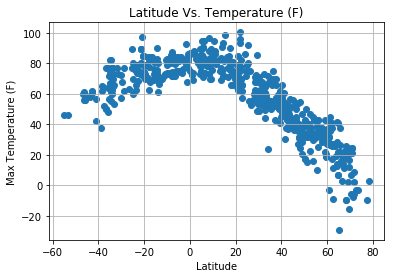

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(city_info_df["Latitude"],city_info_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude Vs. Temperature (F)")

plt.grid(True)
plt.show()
# Save the figure
plt.savefig("output_data/Fig1.png")



# temperature is too high for some reason

#### Latitude vs. Humidity Plot

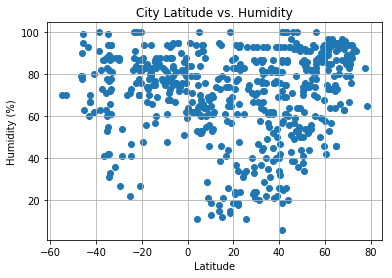

In [10]:

plt.scatter(city_info_df["Latitude"],city_info_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
# Save the figure
plt.savefig("output_data/Fig2.png")

plt.grid(True)
plt.show()

#### Latitude vs. Cloudiness Plot

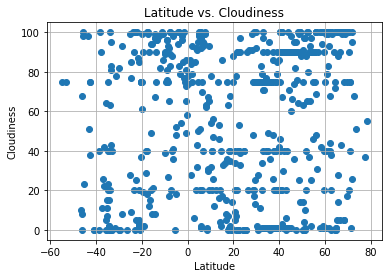

In [11]:

plt.scatter(city_info_df["Latitude"],city_info_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

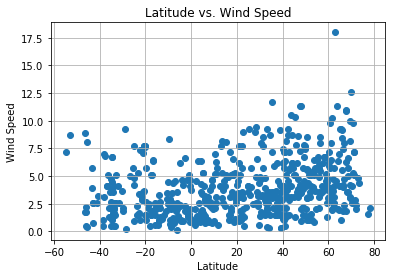

In [12]:

plt.scatter(city_info_df["Latitude"],city_info_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

plt.grid(True)
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create a function to create Linear Regression plots
def linear_regress(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="blue")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
   # plt.legend(fontsize=9)
    plt.show()


In [14]:
# Create Northern and Southern Hemisphere DataFrames
# Filter out data to only Northern (lat above 0) and Southern (lat below 0) Hemisphere
city_info_df_nh = city_info_df.loc[city_info_df["Latitude"] >= 0 ]
#print(city_info_df_nh)
city_info_df_sh = city_info_df.loc[city_info_df["Latitude"] < 0 ]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9148939145308309


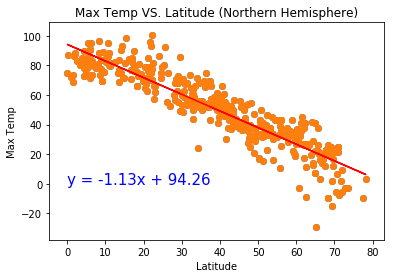

In [15]:
plt.scatter(city_info_df_nh["Latitude"],city_info_df_nh["Max Temp"])
plt.title("Max Temp VS. Latitude (Northern Hemisphere)")

linear_regress(city_info_df_nh["Latitude"], city_info_df_nh["Max Temp"],"Max Temp", (0,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6770557950267582


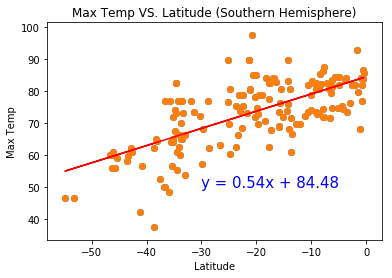

These two charts showing Max Temp Vs. Time, display that the closer you get to the equator(latitude 0), the warmer the temperature is. It can be see in the decrease in temp as you move more north, and also from the south as it gets warmer as you approach 0.


In [27]:
plt.scatter(city_info_df_sh["Latitude"],city_info_df_sh["Max Temp"])
plt.title("Max Temp VS. Latitude (Southern Hemisphere)")

linear_regress(city_info_df_sh["Latitude"], city_info_df_sh["Max Temp"],"Max Temp", (-30,50))

print("These two charts showing Max Temp Vs. Time, display that the closer you get to the equator(latitude 0), the warmer the temperature is. It can be see in the decrease in temp as you move more north, and also from the south as it gets warmer as you approach 0.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3097646832900429


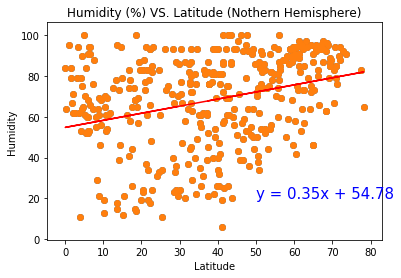

In [19]:
plt.scatter(city_info_df_nh["Latitude"],city_info_df_nh["Humidity"])
plt.title("Humidity (%) VS. Latitude (Nothern Hemisphere)")

linear_regress(city_info_df_nh["Latitude"], city_info_df_nh["Humidity"],"Humidity", (50,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11970901287408056


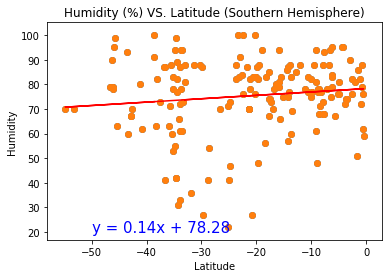

It's hard to see a real relationship with the Humidity vs Latitude graphs of both the Northern and Southern Hemisphere. The R value is relatively low.


In [28]:
plt.scatter(city_info_df_sh["Latitude"],city_info_df_sh["Humidity"])
plt.title("Humidity (%) VS. Latitude (Southern Hemisphere)")

linear_regress(city_info_df_sh["Latitude"], city_info_df_sh["Humidity"],"Humidity", (-50,20))

print("It's hard to see a real relationship with the Humidity vs Latitude graphs of both the Northern and Southern Hemisphere. The R value is relatively low.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1782402823700644


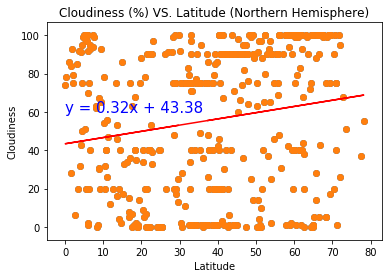

In [21]:
plt.scatter(city_info_df_nh["Latitude"],city_info_df_nh["Cloudiness"])
plt.title("Cloudiness (%) VS. Latitude (Northern Hemisphere)")

linear_regress(city_info_df_nh["Latitude"], city_info_df_nh["Cloudiness"],"Cloudiness", (0,60))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.36126816327563555


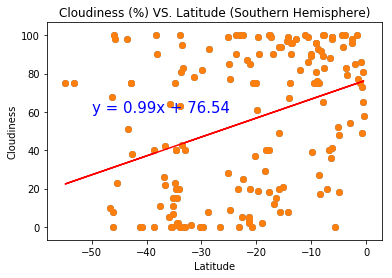

The data is scattered all over the place for Cloudiness vs Latitude, so there's no real correalation between this data.


In [30]:
plt.scatter(city_info_df_sh["Latitude"],city_info_df_sh["Cloudiness"])
plt.title("Cloudiness (%) VS. Latitude (Southern Hemisphere)")

linear_regress(city_info_df_sh["Latitude"], city_info_df_sh["Cloudiness"],"Cloudiness", (-50,60))

print("The data is scattered all over the place for Cloudiness vs Latitude, so there's no real correalation between this data.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2876061228387465


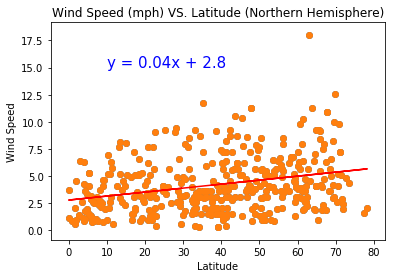

In [23]:
plt.scatter(city_info_df_nh["Latitude"],city_info_df_nh["Wind Speed"])
plt.title("Wind Speed (mph) VS. Latitude (Northern Hemisphere)")

linear_regress(city_info_df_nh["Latitude"], city_info_df_nh["Wind Speed"],"Wind Speed", (10,15))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.17422816706093772


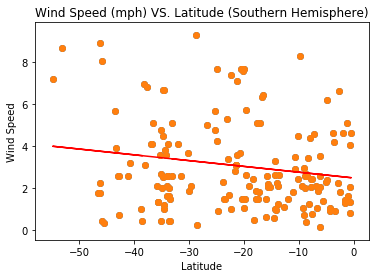

There is no real signifcant indication that wind speed and latitude are related to each other.


In [31]:
plt.scatter(city_info_df_sh["Latitude"],city_info_df_sh["Wind Speed"])
plt.title("Wind Speed (mph) VS. Latitude (Southern Hemisphere)")

linear_regress(city_info_df_sh["Latitude"], city_info_df_sh["Wind Speed"],"Wind Speed", (-50,10))

print("There is no real signifcant indication that wind speed and latitude are related to each other.")